<a href="https://colab.research.google.com/github/peterphoenix/School-Projects/blob/master/Assignment_ANN_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:

import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

def load_dataset():
    dataset = pd.read_csv('pulsar_stars.csv')
    feature = dataset[['Mean of the integrated profile',	'Standard deviation of the integrated profile',	'Excess kurtosis of the integrated profile',	'Skewness of the integrated profile', 'Mean of the DM-SNR curve',	'Standard deviation of the DM-SNR curve',	'Excess kurtosis of the DM-SNR curve',	'Skewness of the DM-SNR curve']]
    target = dataset[['target_class']]
    return feature, target

feature, target = load_dataset()

layer = {
    'input': 8,
    'hidden': 3,
    'output': 2
}

weight = {
    'input_to_hidden': tf.Variable(tf.random_normal([layer['input'], layer['hidden']])),
    'hidden_to_output': tf.Variable(tf.random_normal([layer['hidden'], layer['output']]))
}

bias = {
    'input_to_hidden': tf.Variable(tf.random_normal([layer['hidden']])),
    'hidden_to_output': tf.Variable(tf.random_normal([layer['output']]))
}

feature = OrdinalEncoder().fit_transform(feature)
feature = MinMaxScaler().fit_transform(feature)
target = OneHotEncoder(sparse = False).fit_transform(target)

input_placeholder = tf.placeholder(tf.float32, [None, layer['input']])
output_placeholder = tf.placeholder(tf.float32, [None, layer['output']])

def feed_forward(dataset):
  weightxbias1 = tf.matmul(dataset, weight['input_to_hidden']) + bias['input_to_hidden']
  activation1 = tf.nn.sigmoid(weightxbias1)

  weightxbias2 = tf.matmul(activation1, weight['hidden_to_output']) + bias['hidden_to_output']
  activation2 = tf.nn.sigmoid(weightxbias2)

  return activation2

learning_rate = 0.3
epoch = 5000

output = feed_forward(input_placeholder)
loss = tf.reduce_mean(0.5 * (output - output_placeholder) ** 2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)


feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  feed_train = {
      input_placeholder: feature_train,
      output_placeholder: target_train
  }
  
  print(input_placeholder)
  print(output_placeholder)
  print(feed_train)
  for i in range(epoch+1):
    sess.run(train, feed_dict = feed_train)
    error = sess.run(loss, feed_dict = feed_train)

    if (i+1)%200 == 0:
      print('Epoch: {}, Loss: {}'.format(i+1, error))

  feed_test = {
      input_placeholder: feature_test,
      output_placeholder: target_test
  }

  matches = tf.equal(tf.argmax(output, axis = 1), tf.argmax(output_placeholder, axis = 1))
  accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
  print('Accuracy: {}%'.format(sess.run(accuracy*100, feed_dict=feed_test)))



Tensor("Placeholder_2:0", shape=(?, 8), dtype=float32)
Tensor("Placeholder_3:0", shape=(?, 2), dtype=float32)
{<tf.Tensor 'Placeholder_2:0' shape=(?, 8) dtype=float32>: array([[0.30984127, 0.37543253, 0.52191465, ..., 0.51384083, 0.42964245,
        0.44925029],
       [0.35555556, 0.3638985 , 0.69492503, ..., 0.38408304, 0.71741638,
        0.69204152],
       [0.93206349, 0.52595156, 0.11707036, ..., 0.51268743, 0.76701269,
        0.69896194],
       ...,
       [0.42857143, 0.66551326, 0.63206459, ..., 0.08419839, 0.90599769,
        0.90599769],
       [0.63111111, 0.29296424, 0.31084198, ..., 0.91580161, 0.07035755,
        0.06978085],
       [0.05015873, 0.06805075, 0.95963091, ..., 0.92733564, 0.07670127,
        0.07785467]]), <tf.Tensor 'Placeholder_3:0' shape=(?, 2) dtype=float32>: array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])}
Epoch: 200, Loss: 0.04066358506679535
Epoch: 400, Loss: 0.039176397025585175
Ep

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, metrics

digits = datasets.load_digits()



n_samples = len(digits.data)
t_samples = len(digits.target)
data = digits.data.reshape((n_samples, -1))
target = digits.target.reshape((n_samples, -1))

layer = {
    'input': 64,
    'hidden': 15,
    'output': 10
}

weight = {
    'input_to_hidden': tf.Variable(tf.random_normal([layer['input'], layer['hidden']])),
    'hidden_to_output': tf.Variable(tf.random_normal([layer['hidden'], layer['output']]))
}

bias = {
    'input_to_hidden': tf.Variable(tf.random_normal([layer['hidden']])),
    'hidden_to_output': tf.Variable(tf.random_normal([layer['output']]))
}

data = OrdinalEncoder().fit_transform(data)
data = MinMaxScaler().fit_transform(data)
target = OneHotEncoder(sparse = False).fit_transform(target)

input_placeholder = tf.placeholder(tf.float32, [None, layer['input']])
output_placeholder = tf.placeholder(tf.float32, [None, layer['output']])

def feed_forward(dataset):
  weightxbias1 = tf.matmul(dataset, weight['input_to_hidden']) + bias['input_to_hidden']
  activation1 = tf.nn.sigmoid(weightxbias1)

  weightxbias2 = tf.matmul(activation1, weight['hidden_to_output']) + bias['hidden_to_output']
  activation2 = tf.nn.sigmoid(weightxbias2)

  return activation2

learning_rate = 1
epoch = 1000

output = feed_forward(input_placeholder)
loss = tf.reduce_mean(0.5 * (output - output_placeholder) ** 2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

feature_train, feature_test, target_train, target_test = train_test_split(
    data, target, test_size=0.5, shuffle=False)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  feed_train = {
      input_placeholder: feature_train,
      output_placeholder: target_train
  }

  print(input_placeholder)
  print(output_placeholder)
  print(feed_train)

  for i in range(epoch+1):
    sess.run(train, feed_dict = feed_train)
    error = sess.run(loss, feed_dict = feed_train)

    if (i+1)%1000 == 0:
      print('Epoch: {}, Loss: {}'.format(i+1, error))

  feed_test = {
      input_placeholder: feature_test,
      output_placeholder: target_test
  }

  matches = tf.equal(tf.argmax(output, axis = 1), tf.argmax(output_placeholder, axis = 1))
  accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
  print('Accuracy: {}%'.format(sess.run(accuracy*100, feed_dict=feed_test)))


# predicted = classifier.predict(X_test)


# print("Classification report for classifier %s:\n%s\n"
#       % (classifier, metrics.classification_report(y_test, predicted)))
# disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
# disp.figure_.suptitle("Confusion Matrix")
# print("Confusion matrix:\n%s" % disp.confusion_matrix)


Tensor("Placeholder_16:0", shape=(?, 64), dtype=float32)
Tensor("Placeholder_17:0", shape=(?, 10), dtype=float32)
{<tf.Tensor 'Placeholder_16:0' shape=(?, 64) dtype=float32>: array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.125 , ..., 0.875 , 0.    , 0.    ],
       [0.    , 0.125 , 0.75  , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.1875, 0.    , 0.    ]]), <tf.Tensor 'Placeholder_17:0' shape=(?, 10) dtype=float32>: array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])}
Epoch: 1000, Loss: 0.040637485682964325
Accuracy: 29.477197647094727%


Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

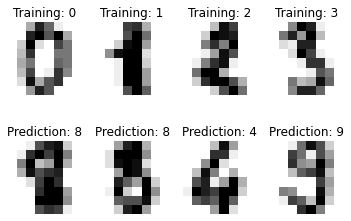

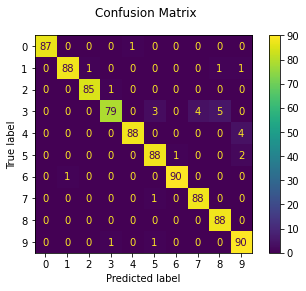

In [ ]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()
print(digits.target)

[0 1 2 ... 8 9 8]
